In [28]:
import tensorflow as tf
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
import tensorflow.keras
from tensorflow.keras.utils import to_categorical




In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train  = X_train / 255
X_test  = X_test / 255
num_pixels = X_train.shape[1] * X_train.shape[2]

y_new = np.zeros(y_train.shape)
y_new[np.where(y_train==5.0)[0]] = 1
y_train = y_new

y_new = np.zeros(y_test.shape)
y_new[np.where(y_test==5.0)[0]] = 1
y_test = y_new

y_train = tensorflow.keras.utils.to_categorical(y_train)
y_test = tensorflow.keras.utils.to_categorical(y_test)

Modifier le fichier pour implémenter ce réseau de neurones. Quelles fonctions d’activation utiliseriezvous pour la couche cachée ? Pour la couche de sortie ?

la couche sortie = softmax

In [23]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(2, input_dim=num_pixels, activation='softmax', kernel_initializer='normal'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 1570      
Total params: 1,570
Trainable params: 1,570
Non-trainable params: 0
_________________________________________________________________


Entrainer le réseau avec juste 10 epchos, le tester et mesurer sa précision. Peut-on améliorer
encore la précision sans changer l’architecture du réseau ?


In [24]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 844us/step - loss: 0.1235 - accuracy: 0.9597
Epoch 2/10
1875/1875 [==============================] - 1s 764us/step - loss: 0.0936 - accuracy: 0.9707
Epoch 3/10
1875/1875 [==============================] - 2s 802us/step - loss: 0.0896 - accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 2s 804us/step - loss: 0.0880 - accuracy: 0.9736
Epoch 5/10
1875/1875 [==============================] - 1s 770us/step - loss: 0.0866 - accuracy: 0.9745
Epoch 6/10
1875/1875 [==============================] - 1s 784us/step - loss: 0.0859 - accuracy: 0.9747
Epoch 7/10
1875/1875 [==============================] - 1s 799us/step - loss: 0.0851 - accuracy: 0.9746
Epoch 8/10
1875/1875 [==============================] - 2s 832us/step - loss: 0.0848 - accuracy: 0.9753
Epoch 9/10
1875/1875 [==============================] - 1s 779us/step - loss: 0.0840 - accuracy: 0.9753
Epoch 10/10
1875/1875 [==============================] - 1s 758u

Modifier le réseau pour rajouter une couche cachée avec un seul neurone. Qu’observez-vous ?

In [29]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(1, input_dim=num_pixels, activation=tf.nn.relu, kernel_initializer='normal'))
model.add(Dense(2, activation='softmax', kernel_initializer='normal'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 785       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 4         
Total params: 789
Trainable params: 789
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0827 - accuracy: 0.9762
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0824 - accuracy: 0.9763
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0821 - accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 1s 728us/step - loss: 0.0820 - accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 1s 733us/step - loss: 0.0817 - accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 1s 747us/step - loss: 0.0817 - accuracy: 0.9766
Epoch 7/10
1875/1875 [==============================] - 1s 764us/step - loss: 0.0813 - accuracy: 0.9767
Epoch 8/10
1875/1875 [==============================] - 1s 705us/step - loss: 0.0813 - accuracy: 0.9770
Epoch 9/10
1875/1875 [==============================] - 1s 723us/step - loss: 0.0811 - accuracy: 0.9771
Epoch 10/10
1875/1875 [==============================] - 1s 700us/step

evaluation

In [31]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 714us/step - loss: 0.0847 - accuracy: 0.9775
0.08466454595327377 0.9775000214576721


preduction

In [32]:
prediction = model.predict([X_test])
print(prediction)

[[9.9977440e-01 2.2562858e-04]
 [9.7975761e-01 2.0242460e-02]
 [9.8475385e-01 1.5246115e-02]
 ...
 [9.9627364e-01 3.7263262e-03]
 [5.6414966e-02 9.4358504e-01]
 [9.9998808e-01 1.1932339e-05]]


In [37]:
i = 0
pred = np.argmax(prediction[i])
while pred != 1:
    i += 1
    pred = np.argmax(prediction[i])


print(pred)
print(i)

1
15


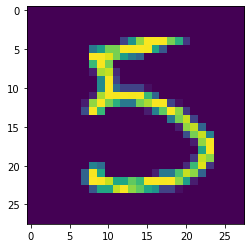

In [38]:
import matplotlib.pyplot as plt

plt.imshow(X_test[i])
plt.show()

we have correctly found a five

### Exercice 2 : Un réseau pour reconnaitre tous les chiffres

In [36]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train  = X_train / 255
X_test  = X_test / 255
num_pixels = X_train.shape[1] * X_train.shape[2]



In [50]:
model_2 = Sequential()
model_2.add(Flatten(input_shape=(28,28)))
model_2.add(Dense(128, activation=tf.nn.relu))
model_2.add(Dense(128, activation=tf.nn.relu))
model_2.add(Dense(10, activation=tf.nn.softmax))
model_2.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

model_2.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_49 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_50 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [51]:
model_2.fit(x=X_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6445 - accuracy: 0.8282
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2922 - accuracy: 0.9166
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2399 - accuracy: 0.9313
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2070 - accuracy: 0.9409
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1820 - accuracy: 0.9477
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1626 - accuracy: 0.9536
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1476 - accuracy: 0.9576
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1347 - accuracy: 0.9617
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1239 - accuracy: 0.9647
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.115

In [52]:
val_loss, val_acc = model_2.evaluate(X_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 851us/step - loss: 0.1219 - accuracy: 0.9629
0.12187458574771881 0.9628999829292297


In [53]:
prediction = model_2.predict([X_test])
print(prediction)

[[6.6232374e-06 2.7295719e-08 3.0061055e-04 ... 9.9921679e-01
  1.1596573e-05 1.4527394e-05]
 [1.9689383e-05 1.8582365e-04 9.9639881e-01 ... 1.5294329e-08
  1.5595173e-05 1.2218460e-10]
 [2.1868038e-05 9.9138695e-01 2.7341160e-03 ... 2.5115947e-03
  1.1471771e-03 1.5099309e-04]
 ...
 [5.7009073e-09 3.4513179e-09 7.4907618e-08 ... 1.1664047e-05
  2.9404648e-05 1.3042642e-04]
 [3.2790358e-05 2.4967592e-06 1.3897169e-06 ... 1.7322953e-06
  1.4176031e-03 3.4068446e-06]
 [6.3404491e-06 1.4997310e-08 1.1299871e-05 ... 5.4531818e-10
  5.9160488e-08 1.4580588e-09]]


In [54]:
pred = np.argmax(prediction[15])
print(pred)


5


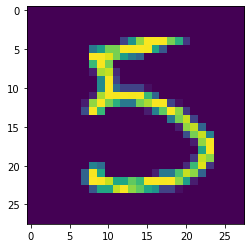

In [55]:
import matplotlib.pyplot as plt

plt.imshow(X_test[15])
plt.show()